# Data Mining Techniques Project
## Playground

In [1]:
%matplotlib inline
import graphviz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder

In [2]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Downloading data

Transforming variables to fit Model.

In [4]:
df = pd.read_csv("Churn_Modelling.csv", index_col=[1])
del df['RowNumber']
del df['Surname']

df.Gender[df.Gender == 'Male'] = 1
df.Gender[df.Gender == 'Female'] = 0
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15620832,723,France,0,35,0,0.00,2,0,1,61290.99,0
15648967,698,Germany,0,64,1,169362.43,1,1,0,84760.32,1
15746674,730,France,0,47,7,0.00,1,1,0,33373.26,1
15660735,581,Spain,0,31,6,0.00,2,1,0,188377.21,0
15667871,572,Spain,1,35,4,152390.26,1,1,0,128123.66,0
15768474,744,Spain,1,34,3,0.00,2,1,0,27244.35,0
15685576,527,Spain,0,36,6,0.00,2,1,1,102280.29,0
15750248,619,France,0,35,8,132292.63,1,1,0,65682.93,0
15762793,850,Germany,0,36,0,136980.23,2,1,1,99019.65,0


Checking for missing values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [6]:
df.isnull().values.any()

False

Transforming the Geography column into Binary Columns to fit the RandomForestClassifier.

In [7]:
enc = OneHotEncoder()
geo = enc.fit_transform(df['Geography'].values.reshape(-1, 1))
df = df.join(pd.DataFrame(geo.toarray(), index=df.index, columns=enc.categories_[0]))

Determining the explanatory and target variables and splitting into training and testing data.

In [8]:
expl = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'France', 'Germany', 'Spain']
x = df[expl]
y = df[['Exited']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
CustomerId,,,,,,,,,,,,
15634602,619,0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
15647311,608,0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
15619304,502,0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
15701354,699,0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
15737888,850,0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0


In [19]:
df.groupby('Exited').count()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
Exited,,,,,,,,,,,,,
0,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963
1,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037


# RandomForestClassifier

Finding the best parameters for the RFC with GridSearch, over all the runs the depths of the best_estimator_ was always between 10 and 16, and min_sample_leaf was at most 5.

In [9]:
base = RandomForestClassifier(n_estimators=500)
depths = (8, 10, 12, 14, 16, 18)
leaves = [2, 5, 10]
grid = GridSearchCV(base, param_grid={'max_depth': depths, 'min_samples_leaf': leaves}, cv=10)
grid.fit(x_train, y_train)
rfc = grid.best_estimator_


Give out the best_estimator_ and the Training and Testing Accuracy.

In [10]:
print(rfc)
pred_train_rfc = rfc.predict_proba(x_train)
pred_test_rfc = rfc.predict_proba(x_test)
acc_train_rfc = accuracy_score(y_train, np.argmax(pred_train_rfc, 1))

acc_test_rfc = accuracy_score(y_test, np.argmax(pred_test_rfc, 1))

print("RFC: Training ACC:", round(acc_train_rfc, 5), "Testing ACC:", round(acc_test_rfc, 5))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
RFC: Training ACC: 0.89475 Testing ACC: 0.861


Show the most important features.

In [11]:
rfc.feature_importances_

array([0.07923561, 0.01894546, 0.32745113, 0.04066004, 0.10364609,
       0.22227131, 0.0098367 , 0.07050391, 0.07345451, 0.01011724,
       0.03507586, 0.00880214])

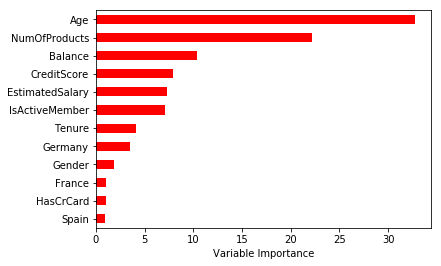

In [12]:
Importance = pd.DataFrame({'Importance': rfc.feature_importances_*100}, index=x.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

Confusion Matrix:

In [13]:
cnf_train_rfc = confusion_matrix(y_test, np.argmax(pred_test_rfc, 1))
print("Decision tree: \n",cnf_train_rfc)

Decision tree: 
 [[1545   41]
 [ 237  177]]


In [14]:
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, pred_test_rfc[:, 1])
rfc_roc_auc = auc(rfc_fpr, rfc_tpr)

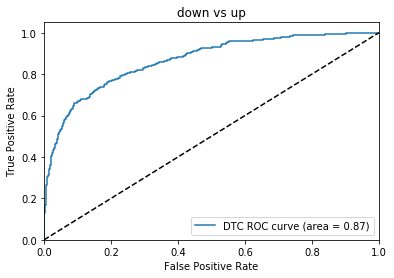

In [15]:
plt.figure()
plt.plot(rfc_fpr, rfc_tpr, label='DTC ROC curve (area = %0.2f)' % rfc_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("down"+ " vs up")
plt.legend(loc="lower right")
plt.show()

Give out one of the DecisionTrees of the RandomForest.

In [21]:
import graphviz
from sklearn.tree import export_graphviz

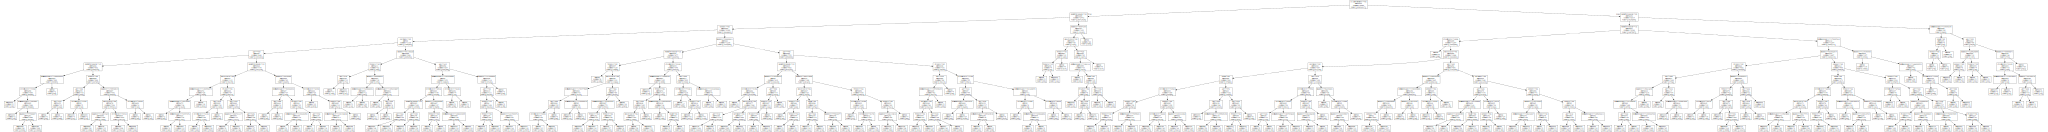

In [26]:
dot_graph = export_graphviz(rfc.estimators_[0], 
                             out_file=None, 
                             feature_names=x_train.columns)
tree_graph = graphviz.Source(dot_graph)
tree_graph